# PRACTICA 4 - TRANSFORMADA DE FOURIER

In [1]:
import imageio                                          #Se importan las librecias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plti
%matplotlib inline

In [2]:
M_YIQ = np.array([[0.299   , 0.587    ,     0.114],    #Se cargan las matrices de convesion
                  [0.595716, -0.274453, -0.321263],    # RGB a YIQ
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563 ,  0.6210],               # YIQ a RGB
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):                              # Funcion que reacomoda el formato
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):                                      # Funcion que aplica la conversion rga a yiq
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):                                      # Funcion que aplica la conversion yiq a rgb
    return apply_matrix(img, M_RGB)

def plot_hist(im, bins, ax, cumulative=False):         # Funcion que grafica el histograma de una imagen
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)
               
def rmse(img1, img2):                                  #Para calcular el error medio cuadrático.
    return np.sqrt(np.mean((img1-img2)**2))

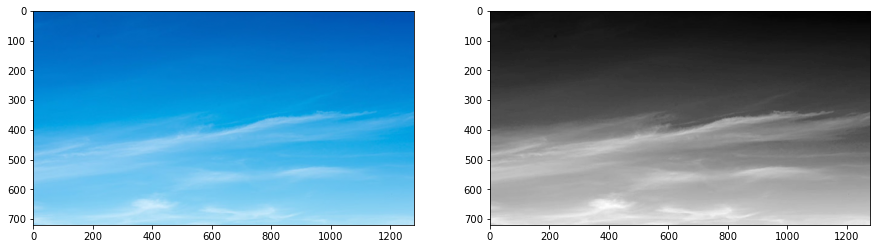

In [3]:
img_rgb = imageio.imread("Cielo.png")[:,:,0:3]/255 
img = rgb2yiq(img_rgb)[:,:,0]
#img = img_rgb[:,:,0]/255

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

1.852423055694739e-14


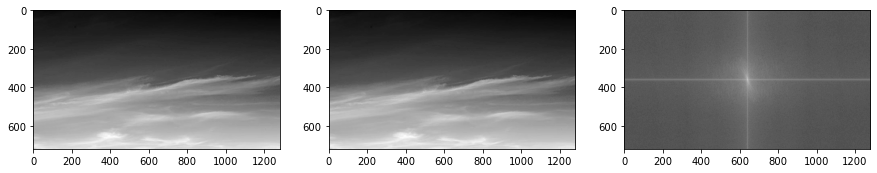

In [6]:
########################## 1_ Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises ##########################

x = np.fft.fft2(img)                # Se genera la fft de la imagen en cuestion
x = np.fft.fftshift(x)              # Se aplica un corrimiento a la imagen

xm = np.log(np.abs(x))              # Parte absoluta
xp = np.angle(x)                    # Parte angular

imgx = np.zeros(img_rgb.shape)

max = xm.max()
min = xm.min()

imgx[:,:,0] = (xm-min)/(max-min)
imgx[:,:,1] = (xp+np.pi)/(2*np.pi)

#print(imgx[:,:,0])
#print(imgx[:,:,1])

z = np.abs(np.fft.ifft2(np.fft.ifftshift(x)))                  

#print(z)

fig, axes = plt.subplots(1, 3, figsize=(15,5))       # Configuracion del ploteo
axes[0].imshow(img,'gray')                           # Se muestra la imagen original
axes[1].imshow(z,'gray')                             # Imagen reconvertida sin pasar por PNG

########################## 2_ Mostrar el módulo en escala logarítmica ##########################

axes[2].imshow(xm,'gray')                            # Mod del espectro en log de la imagen original   


print(rmse(z,img)*100)                               # Error de las funciones de conversion fft (infimo)

########################## 3_ Guardar el espectro como imagen .png y modificarla (filtros) ##########################

plti.imsave("espectro_abs.png", imgx[:,:,0], cmap='gray')  #Se guardan modulo y fase del espectro
plti.imsave("espectro_ang.png", imgx[:,:,1], cmap='gray')

[[0.28412512 0.28887893 0.28980204 ... 0.25228375 0.25102402 0.25001271]
 [0.286244   0.28804208 0.28852229 ... 0.25004093 0.24920378 0.24876327]
 [0.2944147  0.29577412 0.29592797 ... 0.25708054 0.25645147 0.25644002]
 ...
 [0.77558659 0.77620717 0.77592203 ... 0.84181844 0.84113974 0.84086259]
 [0.78455641 0.7853387  0.78156964 ... 0.84754737 0.84666628 0.84625196]
 [0.77278171 0.77405861 0.77435085 ... 0.84026107 0.83927376 0.83860985]]
1.852423055694739e-14
0.4438593540985687


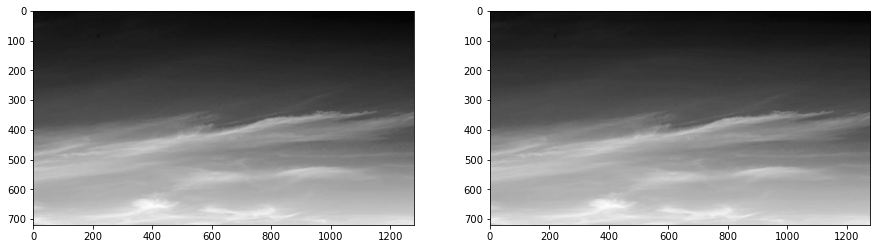

In [111]:
########################## 4_ Implementar la transformada inversa que convierta el espectro guardado en la imagen original ##########################

y_abs = imageio.imread("espectro_abs.png")[:,:,0]/255 
y_ang = imageio.imread("espectro_ang.png")[:,:,0]/255 

y_abs = np.exp(y_abs*(max-min)+min)                       #Se recompone tanto la fase como el mod
y_ang = (y_ang-0.5)*(2*np.pi)
y     = y_abs*np.cos(y_ang)+y_abs*np.sin(y_ang)*1j

y = np.abs(np.fft.ifft2(np.fft.ifftshift(y)))             #Se antitransforma

print(y)

fig, axes = plt.subplots(1, 2, figsize=(15,5))       # Configuracion del ploteo
axes[0].imshow(img,'gray')                           
axes[1].imshow(y,'gray') 

print(rmse(z,img)*100)                               #Se muestra el error antes y despuies de la conversion a PNG
print(rmse(y,img)*100)
